Import Library

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re #regex library

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jayst\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
reddit_df = pd.read_csv("reddit_israel_vs_palestine2.csv")

df Exploration and Cleaning


In [31]:
# reddit_df = reddit_df.sample(20000)

# reddit_df.reset_index(drop=True, inplace=True)

In [32]:
reddit_df.head(30)

,Unnamed: 0,comment_id,score,self_text,subreddit,created_time
0,0,k5tqqej,6,Their goal is to reduce the land mass of the G...,worldnews,2023-10-21 13:01:01+00:00
1,1,k6yes5i,6,Are you high? They’ve offered a two state solu...,IsraelPalestine,2023-10-29 14:33:50+00:00
2,2,k7cqepo,3,&gt; What would Israel’s civilians say is they...,worldnews,2023-11-01 11:53:07+00:00
3,3,k7ymg3e,3,Not agreeing with the Hamas move \nHowever It’...,worldnews,2023-11-05 18:39:24+00:00
4,4,k57dj0z,0,Gotta play the PR game to keep getting aid.,worldnews,2023-10-17 02:10:38+00:00
5,5,k79nppl,3,Moving day MF!,CombatFootage,2023-10-31 19:10:49+00:00
6,6,k9e804r,1,you're blind if you don't see the double stand...,IsraelPalestine,2023-11-15 19:02:31+00:00
7,7,k9rdntm,10,They're gonna turn the world against them even...,PublicFreakout,2023-11-18 13:00:14+00:00
8,8,k8hykmd,1,non muslim under muslim rule,IsraelPalestine,2023-11-09 13:30:12+00:00
9,9,k5z3ozn,5,&gt; the fundamental fact that Palestine is un...,IsraelPalestine,2023-10-22 15:17:20+00:00


In [33]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   comment_id    20000 non-null  object
 2   score         20000 non-null  int64 
 3   self_text     20000 non-null  object
 4   subreddit     20000 non-null  object
 5   created_time  20000 non-null  object
dtypes: int64(2), object(4)
memory usage: 937.6+ KB


Case Folding

In [34]:
reddit_df['self_text'] = reddit_df['self_text'].str.lower()

print('Case Folding Result : \n')
print(reddit_df['self_text'].sample(10))
print('\n\n\n')

Case Folding Result : 

178                       you live in a satellite baghdad.
16896    wish us luck next month, when that temporary b...
2744     lol like any of us know jack about what’s happ...
9461                                              lol nice
9551     hezbollah seems to be still in the "find out" ...
12228    also, lmfaooooo. telling me to do research on ...
15173    your opinions means fuck all because you are a...
17932    oh yes. let's annihilate 2 million people beca...
3027     i get what your saying but child abuse is tota...
18976    this is more strategic not tactical i think. \...
Name: self_text, dtype: object






Tokenizing

In [35]:
reddit_df['self_text'] = reddit_df['self_text'].astype(str)

In [36]:
def remove_self_text_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
reddit_df['self_text'] = reddit_df['self_text'].apply(remove_self_text_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

reddit_df['self_text'] = reddit_df['self_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

reddit_df['self_text'] = reddit_df['self_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

reddit_df['self_text'] = reddit_df['self_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

reddit_df['self_text'] = reddit_df['self_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

reddit_df['self_text'] = reddit_df['self_text'].apply(remove_singl_char)

# # NLTK word rokenize 
# def word_tokenize_wrapper(text):
#     return word_tokenize(text)

# reddit_df['self_text_tokens'] = reddit_df['self_text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(reddit_df['self_text'].head())
print('\n\n\n')

Tokenizing Result : 

0    their goal is to reduce the land mass of the g...
1    are you high theyve offered  two state solutio...
2    gt what would israels civilians say is they we...
3    not agreeing with the hamas move however its a...
4           gotta play the pr game to keep getting aid
Name: self_text, dtype: object






In [37]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization and removing stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join the tokens back into a sentence
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Example usage on 'self_text' column of your DataFrame
reddit_df['clean_text'] = reddit_df['self_text'].apply(clean_text)

In [38]:
reddit_df.head(30)

,Unnamed: 0,comment_id,score,self_text,subreddit,created_time,clean_text
0,0,k5tqqej,6,their goal is to reduce the land mass of the g...,worldnews,2023-10-21 13:01:01+00:00,goal reduce land mass gaza strip theyve alread...
1,1,k6yes5i,6,are you high theyve offered two state solutio...,IsraelPalestine,2023-10-29 14:33:50+00:00,high theyve offered two state solution multipl...
2,2,k7cqepo,3,gt what would israels civilians say is they we...,worldnews,2023-11-01 11:53:07+00:00,gt would israel civilian say one bombed manner...
3,3,k7ymg3e,3,not agreeing with the hamas move however its a...,worldnews,2023-11-05 18:39:24+00:00,agreeing hamas move however time country stood...
4,4,k57dj0z,0,gotta play the pr game to keep getting aid,worldnews,2023-10-17 02:10:38+00:00,got ta play pr game keep getting aid
5,5,k79nppl,3,moving day mf,CombatFootage,2023-10-31 19:10:49+00:00,moving day mf
6,6,k9e804r,1,youre blind if you dont see the double standar...,IsraelPalestine,2023-11-15 19:02:31+00:00,youre blind dont see double standard applied a...
7,7,k9rdntm,10,theyre gonna turn the world against them event...,PublicFreakout,2023-11-18 13:00:14+00:00,theyre gon na turn world eventually bunch viol...
8,8,k8hykmd,1,non muslim under muslim rule,IsraelPalestine,2023-11-09 13:30:12+00:00,non muslim muslim rule
9,9,k5z3ozn,5,gt the fundamental fact that palestine is unde...,IsraelPalestine,2023-10-22 15:17:20+00:00,gt fundamental fact palestine illegal occupati...


In [39]:
for i in range(30):
    print(reddit_df.self_text[i], "\n")

their goal is to reduce the land mass of the gaza strip theyve already told us 

are you high theyve offered  two state solution multiple times over the decades and the on in the early  apparently shocked arafat with how much land israel was offering but yeah im not  fan of bibi or his far right whackjobs either but its not like palestine has even remotely entertained peace ever so its hard to lay all the blame at israels feet and by what metric is hamas winning they seem to have gotten  ton of palestinians killed but that seems like  weird metric to use unless you also acknowledge that dead palestinians is their objective 

gt what would israels civilians say is they were the ones being bombed in this manner build the iron dome instead of playing the dutiful meat shields for their government 

not agreeing with the hamas move however its about time  country stood up to substantialy support the millions of innocent civilians that have crap to do with what is happening to them 

gotta p

In [40]:
for i in range(30):
    print(reddit_df.clean_text[i], "\n")

goal reduce land mass gaza strip theyve already told u 

high theyve offered two state solution multiple time decade early apparently shocked arafat much land israel offering yeah im fan bibi far right whackjobs either like palestine even remotely entertained peace ever hard lay blame israel foot metric hamas winning seem gotten ton palestinian killed seems like weird metric use unless also acknowledge dead palestinian objective 

gt would israel civilian say one bombed manner build iron dome instead playing dutiful meat shield government 

agreeing hamas move however time country stood substantialy support million innocent civilian crap happening 

got ta play pr game keep getting aid 

moving day mf 

youre blind dont see double standard applied anything thats u israel broken un resolution face consequence meanwhile iraq broke got invaded bombed destroyed 

theyre gon na turn world eventually bunch violent idiot 

non muslim muslim rule 

gt fundamental fact palestine illegal occupat

In [41]:
# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

red_df = reddit_df['clean_text']

# Generate sentiment scores for Reddit comments
for comment in red_df:
    compound = analyzer.polarity_scores(comment)["compound"]
    pos = analyzer.polarity_scores(comment)["pos"]
    neu = analyzer.polarity_scores(comment)["neu"]
    neg = analyzer.polarity_scores(comment)["neg"]
    
    scores["Compound"].append(compound)
    scores["Positive"].append(pos)
    scores["Negative"].append(neg)
    scores["Neutral"].append(neu)

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Join the sentiment scores DataFrame with the original DataFrame
df = pd.concat([red_df, sentiments_score], axis=1)

In [42]:
# Define conditions for sentiment categories based on 'Compound' scores
# If Compound score is <= -0.5, classify as 'Negative'
# If Compound score is > -0.5 and < 0.5, classify as 'Neutral'
# If Compound score is >= 0.5, classify as 'Positive'
conditions = [
    (df['Compound'] < 0),
    (df['Compound'] == 0),
    (df['Compound'] > 0)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']
label = [1, 0, 2]

# Create a new column 'Category' using np.select to assign values based on the conditions
df['Category'] = np.select(conditions, values)
df['label'] = np.select(conditions, label)

In [43]:
df = df[df['Category'] != '0']

In [44]:
df.head(30)

,clean_text,Compound,Positive,Negative,Neutral,Category,label
0,goal reduce land mass gaza strip theyve alread...,0.0000,0.000,0.000,1.000,Neutral,0
1,high theyve offered two state solution multipl...,0.5859,0.267,0.207,0.525,Positive,2
2,gt would israel civilian say one bombed manner...,0.4404,0.206,0.000,0.794,Positive,2
3,agreeing hamas move however time country stood...,0.5994,0.373,0.129,0.498,Positive,2
4,got ta play pr game keep getting aid,0.3400,0.255,0.000,0.745,Positive,2
5,moving day mf,0.0000,0.000,0.000,1.000,Neutral,0
6,youre blind dont see double standard applied a...,-0.8957,0.000,0.396,0.604,Negative,1
7,theyre gon na turn world eventually bunch viol...,-0.8020,0.000,0.507,0.493,Negative,1
8,non muslim muslim rule,0.0000,0.000,0.000,1.000,Neutral,0
9,gt fundamental fact palestine illegal occupati...,-0.9118,0.043,0.301,0.656,Negative,1


In [18]:
# Group the DataFrame by 'Category' and count the occurrences of each category
category_counts = df.groupby(['Category'])['Category'].count()

# Create a DataFrame with counts and rename the column to 'Counts'
counts_df = pd.DataFrame(category_counts).rename(columns={"Category": "Counts"})

# Calculate the percentage for each category and add it as a new column 'Percentage'
counts_df['Percentage'] = (counts_df['Counts'] / counts_df['Counts'].sum()) * 100

# Print or return the summary DataFrame
print(counts_df)

          Counts  Percentage
Category                    
Negative    9197      45.985
Neutral     3847      19.235
Positive    6956      34.780


Category
Negative    9197
Positive    6956
Neutral     3847
Name: count, dtype: int64

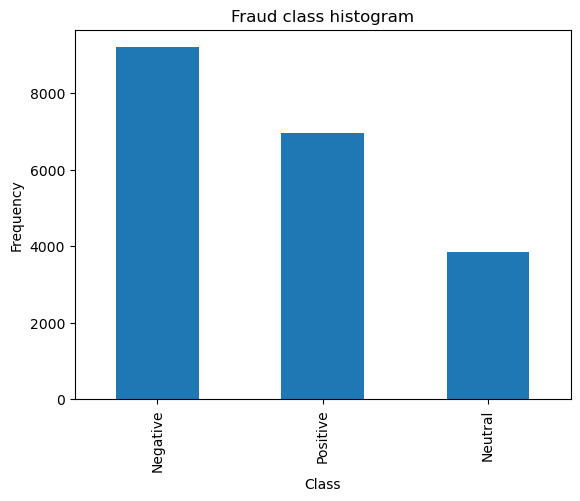

In [20]:
import matplotlib.pyplot as plt

pd.value_counts(df['Category']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Category'].value_counts()

In [21]:
# Implementing text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X_tf = tf_idf.fit_transform(df['clean_text'])
X_tf = X_tf.toarray()

SMOTE

In [22]:
df

,clean_text,Compound,Positive,Negative,Neutral,Category,label
0,goal reduce land mass gaza strip theyve alread...,0.0000,0.000,0.000,1.000,Neutral,0
1,high theyve offered two state solution multipl...,0.5859,0.267,0.207,0.525,Positive,2
2,gt would israel civilian say one bombed manner...,0.4404,0.206,0.000,0.794,Positive,2
3,agreeing hamas move however time country stood...,0.5994,0.373,0.129,0.498,Positive,2
4,got ta play pr game keep getting aid,0.3400,0.255,0.000,0.745,Positive,2
...,...,...,...,...,...,...,...
19995,agree hamas unrepentent terrorist organization...,-0.9313,0.156,0.284,0.560,Negative,1
19996,saddam butcher question justify incompetency i...,-0.9630,0.130,0.316,0.553,Negative,1
19997,yes think right israel reminding region capabl...,0.2960,0.344,0.201,0.455,Positive,2
19998,he cosplaying fredrick douglas,0.0000,0.000,0.000,1.000,Neutral,0


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,  Dropout
from sklearn.model_selection import train_test_split

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


print(df[ df['Category'] == 'Neutral'].size)
print(df[ df['Category'] == 'Positive'].size)
print(df[ df['Category'] == 'Negative'].size)
    
max_fatures = 6000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['clean_text'].values)
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X)

26929
48692
64379


In [25]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 20)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16000, 624) (16000, 3)
(4000, 624) (4000, 3)


In [26]:

print("Before OverSampling, counts of label 'Positif': {}".format(sum(Y_train[:, 2]))) 
print("Before OverSampling, counts of label 'Neutral': {}".format(sum(Y_train[:, 1]))) 
print("Before OverSampling, counts of label 'Negatif': {} \n".format(sum(Y_train[:, 0]))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label 'Positif': {}".format(sum(y_train_res[:, 2]))) 
print("After OverSampling, counts of label 'Neutral': {}".format(sum(y_train_res[:, 1]))) 
print("After OverSampling, counts of label 'Negatif': {}".format(sum(y_train_res[:, 0]))) 

Before OverSampling, counts of label 'Positif': 5601
Before OverSampling, counts of label 'Neutral': 7345
Before OverSampling, counts of label 'Negatif': 3054 

After OverSampling, the shape of train_X: (22035, 624)
After OverSampling, the shape of train_y: (22035, 3) 

After OverSampling, counts of label 'Positif': 7345
After OverSampling, counts of label 'Neutral': 7345
After OverSampling, counts of label 'Negatif': 7345


In [27]:
embed_dim = 32
lstm_out = 64

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 624, 32)           192000    
                                                                 
 dropout (Dropout)           (None, 624, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 221,187
Trainable params: 221,187
Non-trai

In [28]:
batch_size = 32
history = model.fit(X_train_res, y_train_res, epochs = 10, batch_size = batch_size, verbose = 2 , validation_split=0.1)

Epoch 1/10
450/450 - 61s - loss: 0.7898 - accuracy: 0.6226 - val_loss: 0.5849 - val_accuracy: 0.7563 - 61s/epoch - 136ms/step
Epoch 2/10
450/450 - 59s - loss: 0.4309 - accuracy: 0.8419 - val_loss: 0.5501 - val_accuracy: 0.7856 - 59s/epoch - 131ms/step
Epoch 3/10
450/450 - 57s - loss: 0.3069 - accuracy: 0.8943 - val_loss: 0.5781 - val_accuracy: 0.7994 - 57s/epoch - 127ms/step
Epoch 4/10
450/450 - 57s - loss: 0.2571 - accuracy: 0.9178 - val_loss: 0.5980 - val_accuracy: 0.7900 - 57s/epoch - 127ms/step
Epoch 5/10
450/450 - 62s - loss: 0.2237 - accuracy: 0.9287 - val_loss: 0.6613 - val_accuracy: 0.7869 - 62s/epoch - 137ms/step
Epoch 6/10
450/450 - 58s - loss: 0.2042 - accuracy: 0.9343 - val_loss: 0.6495 - val_accuracy: 0.7850 - 58s/epoch - 128ms/step
Epoch 7/10
450/450 - 55s - loss: 0.1837 - accuracy: 0.9406 - val_loss: 0.6677 - val_accuracy: 0.7837 - 55s/epoch - 123ms/step
Epoch 8/10
450/450 - 55s - loss: 0.1650 - accuracy: 0.9460 - val_loss: 0.7217 - val_accuracy: 0.7919 - 55s/epoch - 122

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

labels = ['Neutral', 'Positive', 'Negative']
report = classification_report(Y_test, y_pred, target_names=labels)
print("Classification Report:\n", report)

125/125 [==============================] - 5s 39ms/step
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.88      0.79      0.83       793
    Positive       0.82      0.81      0.81      1852
    Negative       0.73      0.77      0.75      1355

   micro avg       0.80      0.79      0.79      4000
   macro avg       0.81      0.79      0.80      4000
weighted avg       0.80      0.79      0.80      4000
 samples avg       0.79      0.79      0.79      4000



c:\Users\Jayst\anaconda3\envs\FPAI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:

import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

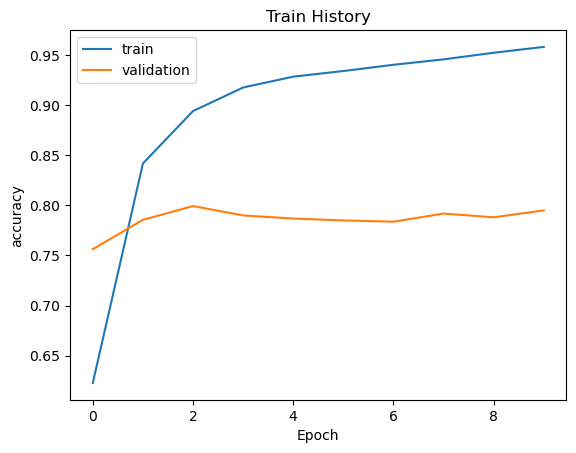

In [31]:
show_train_history(history,'accuracy','val_accuracy')